# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_mouse_data = pd.merge(study_results, mouse_metadata, on = ["Mouse ID", "Mouse ID"], how='left')

# Display the data table for preview
full_mouse_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(full_mouse_data["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = full_mouse_data[full_mouse_data.duplicated()]
duplicate["Mouse ID"].values

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. g989
full_mouse_data[full_mouse_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
to_drop = full_mouse_data[full_mouse_data["Mouse ID"] == "g989"].index

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = full_mouse_data.drop(to_drop)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_data["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = clean_data.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_data.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = clean_data.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor = clean_data.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].std()
std_err_tumor = clean_data.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_reg = clean_data["Drug Regimen"].sort_values().unique()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_df = pd.DataFrame(index = drug_reg, data = {"Mean Tumor Volume": mean_tumor,
                                                 "Median Tumor Volume": median_tumor,
                                                 "Tumor Volume Variance":variance_tumor,
                                                 "Tumor Volume Std. Dev.": std_dev_tumor,
                                                 "Tumor Volume Std. Err.": std_err_tumor
                                                })

#name the index column

drug_df.index.name = "Drug Regimen"
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

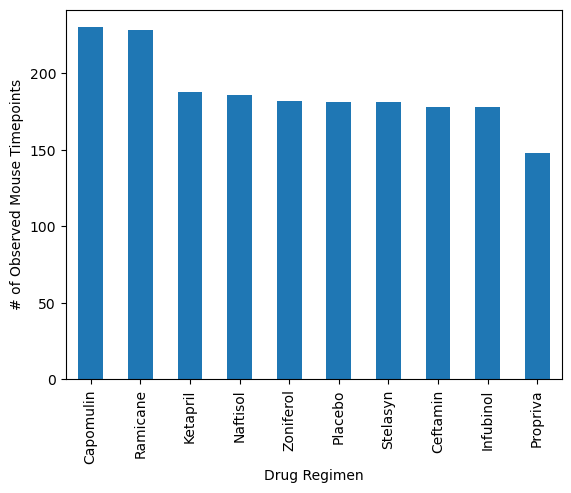

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id = clean_data.groupby(by = "Drug Regimen")["Mouse ID"].count().sort_values(ascending = False)

mouse_time_pan_bar = pd.DataFrame(data = mouse_id)
mouse_time_pan_bar = mouse_time_pan_bar.plot(kind = "bar", legend = False, xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")

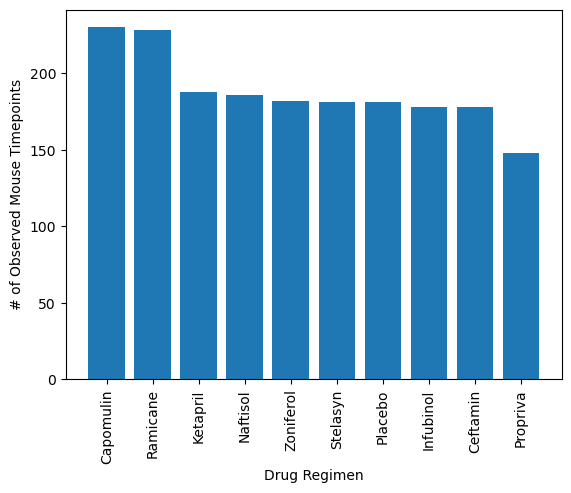

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
plt.bar(x = x_axis, height = mouse_id)
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


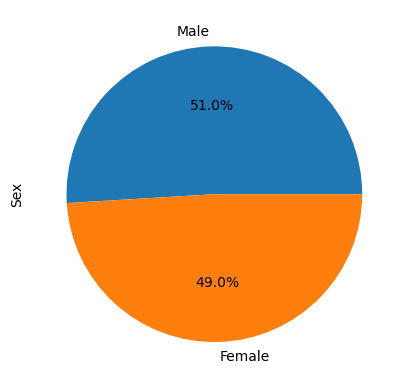

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
num_males = (len(clean_data[clean_data["Sex"] == "Male"]))
num_females = (len(clean_data[clean_data["Sex"] == "Female"]))
gender_data = pd.DataFrame(index = clean_data["Sex"].sort_values(ascending = False).unique(), data ={"Sex":[num_males, num_females]})
gender_plot = gender_data.plot(y = "Sex", kind = "pie", autopct='%1.1f%%', legend = False)

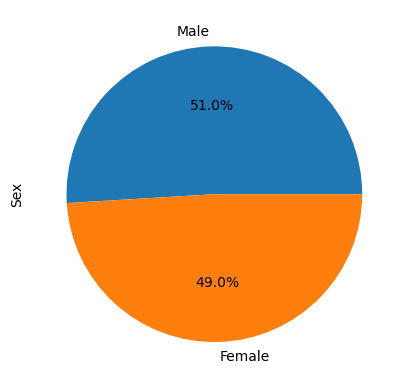

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_data.index
num_mouse = gender_data["Sex"].values

plt.pie(x= num_mouse, labels = labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(by = "Mouse ID")["Timepoint"].max()
last_timepoint = pd.DataFrame(data= {"Last Timepoint":last_timepoint})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

clean_data = clean_data.join(last_timepoint, how = "right", on = "Mouse ID")

In [15]:
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
113,a203,0,45.000000,0,Infubinol,Female,20,23,45
389,a203,5,48.508468,0,Infubinol,Female,20,23,45
598,a203,10,51.852437,1,Infubinol,Female,20,23,45
758,a203,15,52.777870,1,Infubinol,Female,20,23,45
1018,a203,20,55.173336,1,Infubinol,Female,20,23,45
...,...,...,...,...,...,...,...,...,...
1143,z969,25,63.145652,2,Naftisol,Male,9,30,45
1407,z969,30,65.841013,3,Naftisol,Male,9,30,45
1529,z969,35,69.176246,4,Naftisol,Male,9,30,45
1730,z969,40,70.314904,4,Naftisol,Male,9,30,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_df = clean_data[clean_data["Timepoint"] == clean_data["Last Timepoint"]][["Tumor Volume (mm3)", "Drug Regimen"]]
tumor_vol = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
for i in range(4):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    tumor_vol.append(tumor_volume_df[tumor_volume_df["Drug Regimen"] == treatments[i]]["Tumor Volume (mm3)"])
    

    # add subset 
    quartiles = tumor_vol[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    for x in tumor_vol[i]:
        if ((x < lower_bound) or (x > upper_bound)):
            print(f"{treatments[i]}'s potential outliers: 31 {x} Name: Tumor Volume (mm3), dtype: float64")
    print(f"{treatments[i]}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31 36.3213458 Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


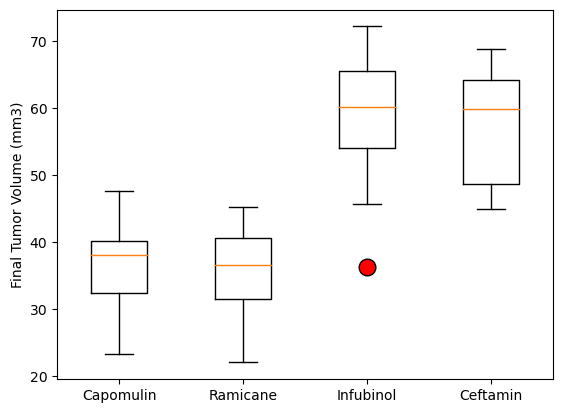

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
filercolor = dict(markerfacecolor = "r", markersize = 12)
fig1, tumor_vol_dis = plt.subplots()
tumor_vol_dis.boxplot(tumor_vol, flierprops = filercolor)
tumor_vol_dis.set_xticklabels(labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
tumor_vol_dis.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

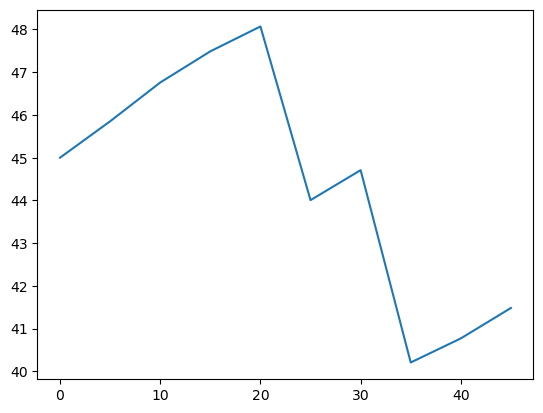

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"
tumor_vol_mouse = clean_data[clean_data["Mouse ID"] == mouse]["Tumor Volume (mm3)"]
timepoints_mouse = clean_data[clean_data["Mouse ID"] == mouse]["Timepoint"]
plt.plot(timepoints_mouse, tumor_vol_mouse)
plt.show()

In [19]:
clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()

array(['b128', 'b742', 'f966', 'g288', 'g316', 'i557', 'i738', 'j119',
       'j246', 'l509', 'l897', 'm601', 'm957', 'r157', 'r554', 'r944',
       's185', 's710', 't565', 'u364', 'v923', 'w150', 'w914', 'x401',
       'y793'], dtype=object)

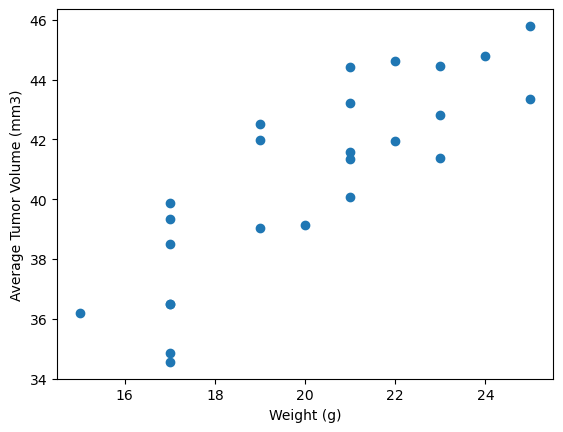

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tum_vol = clean_data[clean_data["Drug Regimen"] == "Capomulin"].groupby(by = ["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
avg_tum_vol = pd.DataFrame(avg_tum_vol)
avg_tum_vol = avg_tum_vol.sort_values(by = "Weight (g)")
avg_tum_vol = avg_tum_vol["Tumor Volume (mm3)"]
weights = avg_tum_vol.index.get_level_values(1)


plt.scatter(weights, avg_tum_vol)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


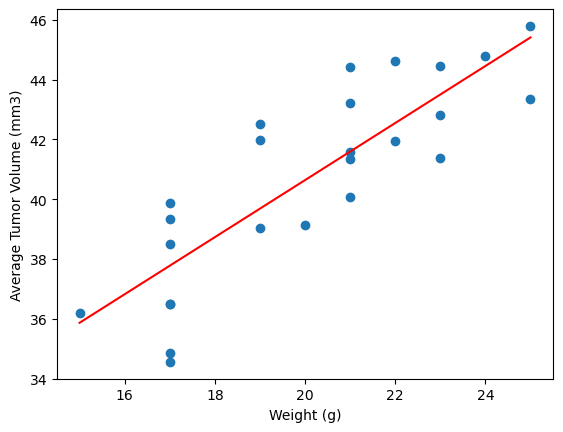

In [25]:
# Calculate the correlation coefficient and a linear regression model 
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weights,avg_tum_vol)[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, avg_tum_vol)
regress_values = weights * slope + intercept

plt.scatter(weights, avg_tum_vol)
plt.plot(weights, regress_values, "r-")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()